Example 1
Individual loss of different orders

This example is to be studied with discussion about the granularity of L

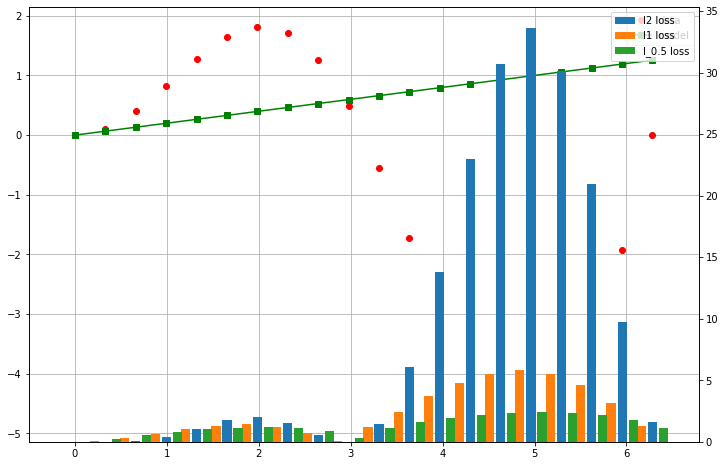

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, np.pi*2, 20)
ys = np.sin(xs) * xs 

def h1(x):
    return x * 0.2 

def h0(x):
    return 0.1



def l2_loss(ypred, ygnd):
    return (ypred - ygnd) * (ypred - ygnd)
def l1_loss(ypred, ygnd):
    return np.abs((ypred - ygnd))
def l0_5_loss(ypred, ygnd):
    return np.power(np.abs((ypred - ygnd)), 0.5)

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(xs, ys, marker="o", linestyle="", color=[1, 0, 0], label="data")
ax1.plot(xs, h1(xs), marker="s", linestyle="-", color=[0, 0.5, 0], label="model")
ax1.legend()

ax2 = ax1.twinx()

e2 = l2_loss(h1(xs), ys)
e1 = l1_loss(h1(xs), ys)
e0_5 = l0_5_loss(h1(xs), ys)
ax2.bar(xs, e2, width=0.1, label="l2 loss")
ax2.bar(xs-0.12, e1, width=0.1, label="l1 loss")
ax2.bar(xs+0.12, e0_5, width=0.1, label="l_0.5 loss")
ax2.legend()
ax1.grid('on')

As the criterion for comparison, the job is essentially to tell good fits from bad ones. 

Let us check the model performance on the data points according to l1, l2, l0.5.

REMINDER:

We are looking at the 

SAME data samples.

and the

SAME model.

The only thing that changes is how we measure the difference.

In [2]:
# just manual check
print("E1", e1[:5])
print("E2", e2[:5])
print("E0.5", e0_5[:5])

E1 [0.         0.04123736 0.27395529 0.63212132 1.01774409]
E2 [0.         0.00170052 0.0750515  0.39957737 1.03580304]
E0.5 [0.         0.20306984 0.52340738 0.79506058 1.00883304]


In [3]:
# lets RANK them
print("E1 sorting", np.argsort(e1))
print("E2 sorting", np.argsort(e2))
print("E0.5 sorting", np.argsort(e0_5))


E1 sorting [ 0  1  9  2  3  8  4 10  7 19  5  6 11 18 12 17 13 16 14 15]
E2 sorting [ 0  1  9  2  3  8  4 10  7 19  5  6 11 18 12 17 13 16 14 15]
E0.5 sorting [ 0  1  9  2  3  8  4 10  7 19  5  6 11 18 12 17 13 16 14 15]


You can see that the criteria do agree with each other. 

Example 2

In this example, let us check the criteria working on the training dataset.

In [4]:
def h0(x):
    return np.ones_like(x)*-0.9

def h1(x):
    return -x * 0.9

print(l2_loss(h0(xs), ys).sum(), l2_loss(h1(xs), ys).sum())
print(l0_5_loss(h0(xs), ys).sum(), l0_5_loss(h1(xs), ys).sum())

102.57337648236727 126.13161343690241
27.41190144799473 25.02258064006359


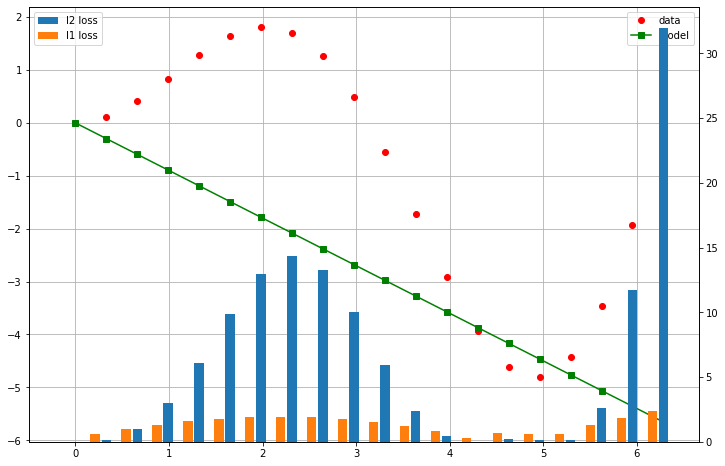

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 8))
h = h1

ax1.plot(xs, ys, marker="o", linestyle="", color=[1, 0, 0], label="data")
ax1.plot(xs, h(xs), marker="s", linestyle="-", color=[0, 0.5, 0], label="model")
ax1.legend()

ax2 = ax1.twinx()

e2 = l2_loss(h1(xs), ys)
e1 = l1_loss(h1(xs), ys)
e0_5 = l0_5_loss(h1(xs), ys)
ax2.bar(xs, l2_loss(h(xs), ys), width=0.1, label="l2 loss")
ax2.bar(xs-0.12, l0_5_loss(h(xs), ys), width=0.1, label="l1 loss")
# ax2.bar(xs+0.12, e0_5, width=0.1, label="l_0.5 loss")
ax2.legend()
ax1.grid('on')

Example 3

Distinction between "learning-model relevant" and "task relevant".

See how the errors in a classification problem is counted.

DIY: modify the w0 and w1 to check

/Users/junli/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/junli/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Text(0.5, 1.0, 'Error count: 30')

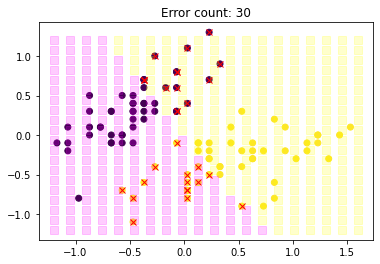

In [6]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X = X[:100, :2]
X = X - np.mean(X, axis=0)
y = (y[:100]-0.5)*2

def h(X, w0, w1):
    return np.sign(w0*X[:, 0] + w1*X[:, 1])

xgrid, ygrid = np.meshgrid(np.linspace(-1.2, 1.6, 20), np.linspace(-1.2, 1.2, 20))
gridsamples = np.stack([xgrid.flatten(), ygrid.flatten()]).T

plt.scatter(X[:,0], X[:, 1], c=y)

w0 = 0.5
w1 = 0.3
gridpred = h(gridsamples, w0, w1)
plt.plot(gridsamples[gridpred>0, 0], gridsamples[gridpred>0, 1], 
         color=[1, 1, 0, 0.2], marker='s', markersize=8, linestyle='')
plt.plot(gridsamples[gridpred<0, 0], gridsamples[gridpred<0, 1], 
         color=[1, 0, 1, 0.2], marker='s', markersize=8, linestyle='')
errind = h(X, w0, w1) != y
plt.plot(X[errind, 0], X[errind, 1], color='r', linestyle='', marker='x')
plt.title(f"Error count: {errind.sum():d}")

Now check the error count number over the *parameter space*.

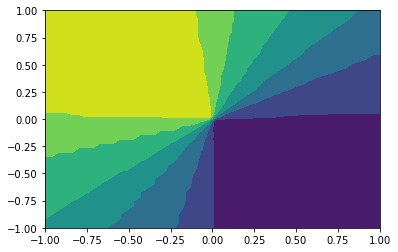

In [7]:
w0grid, w1grid = np.meshgrid(
    np.linspace(-1.0, 1.0, 50), np.linspace(-1.0, 1.0, 50))
wgrid = np.stack([w0grid.flatten(), w1grid.flatten()]).T

werr_counts = []
for w0, w1 in wgrid:
    errind = h(X, w0, w1) != y
    werr_counts.append(errind.sum())

werr_counts = np.array(werr_counts).reshape(w0grid.shape)
plt.contourf(w0grid, w1grid, werr_counts)




Show it in 3D

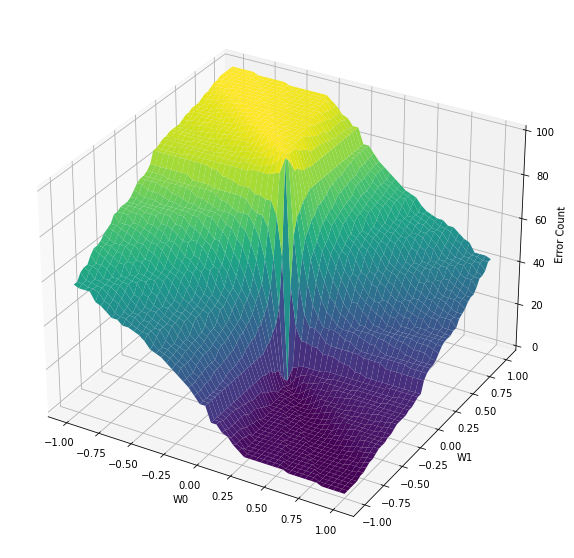

In [8]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(w0grid, w1grid, werr_counts, cmap='viridis')
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Error Count')
plt.show()

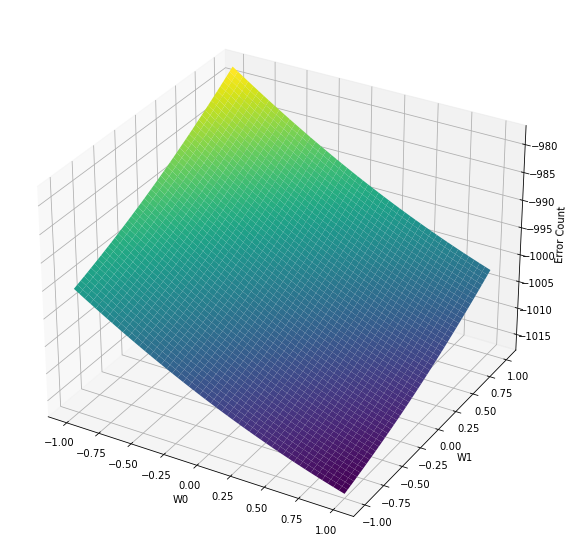

In [13]:
def probpred(X, w0, w1):
    s = w0*X[:, 0] + w1*X[:, 1]
    
    return 1 / np.exp(-s) + 1

def cls_loss(ypred, ytrue):
    l = ypred*0
    l[ytrue>0] = np.log( np.maximum(1-ypred[ytrue>0], 1e-9) )
    l[ytrue<=0] = np.log( np.maximum(ypred[ytrue<=0], 1e-9))
    return l

werr_loss = []
for w0, w1 in wgrid:
    
    werr_loss.append(cls_loss(probpred(X, w0, w1), y).sum())


werr_loss = np.array(werr_loss).reshape(w0grid.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(w0grid, w1grid, werr_loss, cmap='viridis')
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Error Count')
plt.show()

Example 4

How the cross entropy loss changes with prediction.

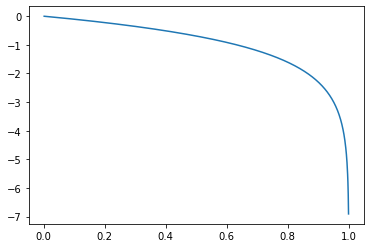

In [18]:
dummy_out = np.linspace(0.001, 0.999, 1000)
dummy_loss = cls_loss(dummy_out, np.ones_like(dummy_out))
plt.plot(dummy_out, dummy_loss)